In [2]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import pyplot
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import RandomForestRegressor  
from sklearn.metrics import accuracy_score 

In [3]:
#load in clean dataset
data = pd.read_csv("top10_data.csv")
data.head(3)

,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,Points (Total),Points (Ind for each Artist/Nat),id,Song URL,Highest Rank,Previous Popularity,Number Songs Previous,Number of Artists,Top 10,Previous Top Rank Avg
0,197,I Miss You,"Grey, Bahari",2017-02-01,-0.166703,0.745431,0.196288,-0.310595,0.528030,-0.167878,...,4,2.0,1sl5tSzfK1JrcQIcA8rYDy,https://open.spotify.com/track/1sl5tSzfK1JrcQI...,175,0.0,0.0,2.0,False,201.0
1,188,Location,Khalid,2017-02-01,0.411958,-1.085786,-1.772413,2.446186,0.375981,-0.167878,...,13,13.0,152lZdxL1OR0ZMW6KquMif,https://open.spotify.com/track/152lZdxL1OR0ZMW...,33,0.0,0.0,1.0,False,201.0
2,199,Magic,"Thomas Gold, Jillian Edwards",2017-02-01,-0.308005,1.431411,0.192504,-0.718699,-0.744384,-0.155927,...,2,1.0,5abwHwUhywLGNli5NDcEN7,https://open.spotify.com/track/5abwHwUhywLGNli...,168,0.0,0.0,2.0,False,201.0


In [4]:
#find count of songs in top 10
data["Top 10"].value_counts()

Top 10
False    6808
True      693
Name: count, dtype: int64

In [5]:
#print out the data columns
data.columns

Index(['Rank', 'Title', 'Artists', 'Date', 'Danceability', 'Energy',
       'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Valence', '# of Artist', 'Artist (Ind.)', '# of Nationality',
       'Nationality', 'Continent', 'Points (Total)',
       'Points (Ind for each Artist/Nat)', 'id', 'Song URL', 'Highest Rank',
       'Previous Popularity', 'Number Songs Previous', 'Number of Artists',
       'Top 10', 'Previous Top Rank Avg'],
      dtype='object')

In [6]:
#list historical popularity features and list for the rest of the features 
popularity_cols = ['Previous Popularity', 'Number Songs Previous', 'Previous Top Rank Avg']
features = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness','Valence', 'Number of Artists']

In [7]:
#find the unique artists of the top number songs previous 
data.sort_values(by='Number Songs Previous', ascending=False).head(100)['Artists'].unique()


array(['Taylor Swift', 'Drake', 'BTS'], dtype=object)

# Popularity Measures
## Previous Popularity 

In [8]:
#determine counts of songs with previous popularity True (1.0)
data['Previous Popularity'].value_counts()

Previous Popularity
0.0    5550
1.0    1951
Name: count, dtype: int64

In [9]:
#percentage of songs with previous popularity 
1951/len(data)

0.26009865351286493

In [10]:
#find counts of songs in top 10 grouped by previous popularity
data[data['Top 10'] == True]['Previous Popularity'].value_counts()

Previous Popularity
0.0    347
1.0    346
Name: count, dtype: int64

In [11]:
#determine proportion of top 10 songs that have previous popularity
346/len(data[data['Top 10'] == True])

0.49927849927849927

In [12]:
#find counts of songs not in the top 10 grouped by previous popularity
data[data['Top 10'] == False]['Previous Popularity'].value_counts()

Previous Popularity
0.0    5203
1.0    1605
Name: count, dtype: int64

## Number of songs previous & previous top rank avg 

       Number Songs Previous  Previous Top Rank Avg
count             693.000000             693.000000
mean               17.445887              97.303469
std                26.139223              73.040051
min                 0.000000               1.000000
25%                 0.000000              36.503704
50%                 7.000000              65.333333
75%                24.000000             201.000000
max               153.000000             201.000000
       Number Songs Previous  Previous Top Rank Avg
count            6808.000000            6808.000000
mean                9.241334             127.757882
std                17.056929              64.557399
min                 0.000000               1.000000
25%                 0.000000              70.333333
50%                 2.000000             119.414286
75%                11.000000             201.000000
max               151.000000             201.000000


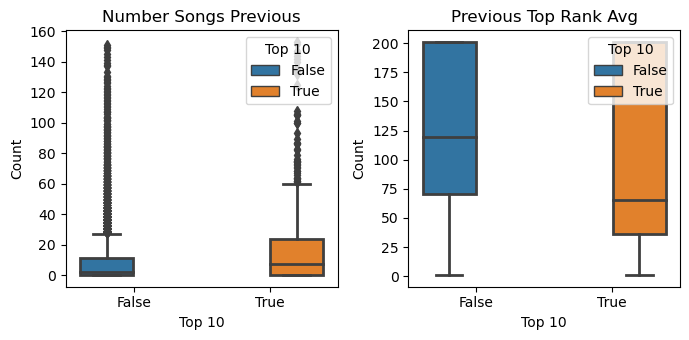

In [15]:
import matplotlib.pyplot as plt

popularity_columns = ['Number Songs Previous', 'Previous Top Rank Avg']

#get descriptive statistics for top 10
popularity_stats = data[data['Top 10'] == True][popularity_columns].describe()
print(popularity_stats)

#get descriptive statistics for non top 10
popularity_stats = data[data['Top 10'] == False][popularity_columns].describe()
print(popularity_stats)

#plot boxplots for each pop. statistic
fig, axes = plt.subplots(1, len(popularity_columns), figsize=(7, 3.5))

column = popularity_columns[0]
sns.boxplot(data=data, y=column, x = 'Top 10', ax=axes[0], linewidth=2, hue='Top 10')
axes[0].set_title(f"{column}")
axes[0].set_ylabel('Count')

column = popularity_columns[1]
sns.boxplot(data=data, y=column, x = 'Top 10', ax=axes[1], linewidth=2, hue='Top 10')
axes[0].legend(title='Top 10', loc='upper right')
axes[1].set_title(f"{column}")
axes[1].set_ylabel('Count')

plt.legend(title='Top 10', loc='upper right')
plt.tight_layout()
plt.savefig('boxplot.png')
plt.show()



In [16]:
#find the mean of the top 10 songs for features
top_mean = data[data['Top 10'] == True][features].mean()

In [17]:
#find the mean of the songs not in top 10 for features
not_top_mean = data[data['Top 10'] == False][features].mean()

In [18]:
#difference between the top 10 mean and not top 10 mean
top_mean - not_top_mean

Danceability         0.050422
Energy              -0.136047
Loudness            -0.015722
Speechiness         -0.078101
Acousticness         0.040014
Instrumentalness    -0.046194
Valence             -0.106463
Number of Artists   -0.047888
dtype: float64

In [19]:
#columns in features
features

['Danceability',
 'Energy',
 'Loudness',
 'Speechiness',
 'Acousticness',
 'Instrumentalness',
 'Valence',
 'Number of Artists']

In [20]:
#song characteristics
features[:-1]


['Danceability',
 'Energy',
 'Loudness',
 'Speechiness',
 'Acousticness',
 'Instrumentalness',
 'Valence']

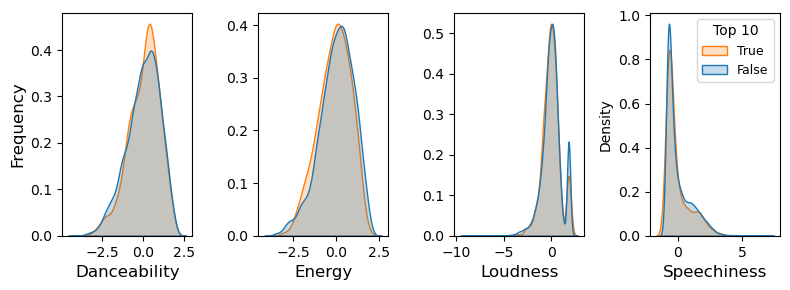

In [21]:
#plot histograms for danceability, energy, loudness, and speechiness separated by top 10 and not top 10
fig, axes = plt.subplots(1, 4, figsize=(8, 3))
hue_order = [False, True]
for i, characteristic in enumerate(features[:-1]):
    if i < 4:
        sns.kdeplot(data=data, x=characteristic, common_norm=False, hue=data['Top 10'], fill=True, ax=axes[i], legend=False, 
                    hue_order=hue_order)
        axes[i].set_xlabel(characteristic, fontsize=12)
        axes[i].set_ylabel('Frequency', fontsize=12) if i == 0 else ''
        if i == 0:
            axes[i].set_ylabel('Frequency', fontsize=12)
        if i == 3:
            axes[i].legend(title='Top 10', labels=['True', 'False'], loc='upper right', fontsize=9)
        elif i != 0:
            axes[i].set_ylabel('')

plt.tight_layout()
#save the plot as a png
plt.savefig('distplot_chars.png')
plt.show()

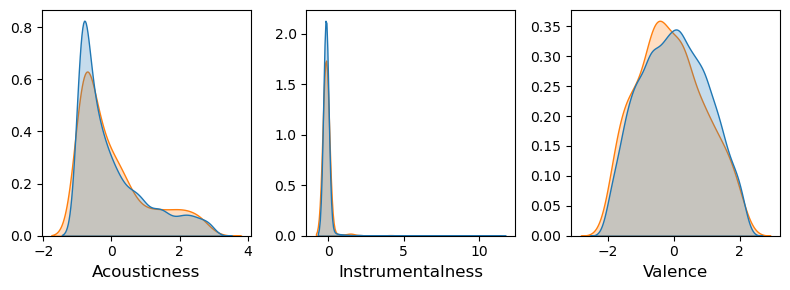

In [22]:
#plot overlapping histograms for acousticness, instrumentalness, and valence, separated by top 10 and not top 10
fig, axes = plt.subplots(1, 3, figsize=(8, 3))
hue_order = [False, True]
for i, characteristic in enumerate(features[:-1]):
    if i >= 4:
        i = i - 4
        sns.kdeplot(data=data, x=characteristic, common_norm=False, hue=data['Top 10'], fill=True, ax=axes[i], 
                    legend=False, hue_order=hue_order)
        axes[i].set_xlabel(characteristic, fontsize=12)
        axes[i].set_ylabel('Frequency', fontsize=12) if i == 0 else ''
        if i == 0:
            axes[i].set_ylabel('Frequency', fontsize=12)
        if i == 3:
            axes[i].legend(title='Top 10', labels=['True', 'False'], loc='upper right', fontsize=9)
        else:
            axes[i].set_ylabel('')

plt.tight_layout()
#save the plot as a png
plt.savefig('distplot_chars.png')
plt.show()

In [23]:
#find median of energy of songs in the top 10
data[data['Top 10'] == True]['Energy'].median()

-0.0510029611091113

In [24]:
#find median of energy of songs not in the top 10
data[data['Top 10'] == False]['Energy'].median()

0.10305182534524825